In [16]:
import numpy, scipy, pandas
import matplotlib, seaborn
import matplotlib.pyplot as plt
from imp import reload

import peap
from peap import one_dim

from peap import utilities


In [7]:
reload(peap.utilities)

<module 'peap.utilities' from '/gpfs/data01/glasslab/home/dskola/workspace/ABC/peap/utilities.py'>

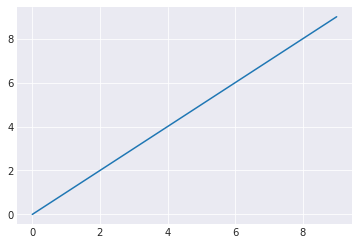

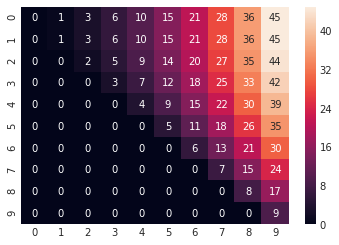

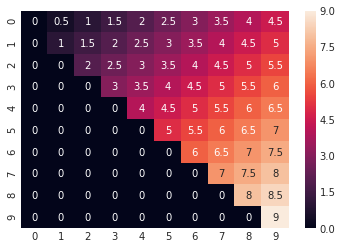

In [37]:
reload(peap.one_dim)
from peap.one_dim import *

test_vec = numpy.arange(10)

plt.plot(test_vec)
plt.show()

sums = compute_subarray_sums(test_vec)
seaborn.heatmap(sums, annot=True)
plt.show()
means = compute_subarray_means(test_vec)

seaborn.heatmap(means, annot=True)

In [54]:
b = scipy.stats.beta
b.fit()

## Distro

In [103]:
class empirical_gen(scipy.stats.rv_continuous):
#     def __init__(self, frequencies, support=DEFAULT_SUPPORT, pseudocount=0):
#         assert support[1] >= support[0]

#         self.support = support

#         self.num_bins = len(frequencies)
#         self.bin_size = self.support_size / self.num_bins
#         self.bin_starts = numpy.linspace(self.support[0], self.support[1] - self.bin_size, num=self.num_bins)
#         self.bin_midpoints = self.bin_starts + self.bin_size / 2
#         self.bin_ends = numpy.linspace(self.support[0] + self.bin_size, self.support[1], num=self.num_bins)

#         self.frequencies = numpy.array(frequencies)
    
    def _fit(self, num_bins=DEFAULT_BINS, support=None, pseudocount=0):
#         data = clean_array(data)
        assert len(data) > 0, 'Data must have non-zero length'
        assert sum(numpy.isnan(data)) == 0, 'Data must not contain NaN'
        assert sum(numpy.isinf(data)) == 0, 'Data must not contain inf'
        assert sum(numpy.isneginf(data)) == 0, 'Data must not contain neginf'

        if support is None: # set the support to the min and max of the fit data
            support = (data.min(), data.max())
        self.a, self.b = support

        counts, bins = numpy.histogram(data, bins=numpy.linspace(self.a, self.b, num=num_bins + 1))
        counts += pseudocount
        self.frequencies = counts / counts.sum()
        self._cdf_values = numpy.cumsum(self.frequencies)
        self._sf_values = numpy.cumsum(self.frequencies[::-1])[::-1]  # Needed to avoid round-off errors near 1. Maybe we can do all this better natively in logspace.


#     @property
#     def densities(self):
#         return self.frequencies / self.bin_size

#     @property
#     def support_size(self):
#         return self.support[1] - self.support[0]

#     def copy(self):
#         return type(self)(frequencies=self.densities, support=self.support)

#     def mean(self):
#         """
#         Returns the expectation of the random variable described by this distribution
#         """
#         return numpy.sum(self.frequencies * self.bin_midpoints)

#     def std(self):
#         """
#         Returns the standard deviation of the random variable described by this distribution
#         """
#         m = self.mean()
#         return numpy.sqrt((((self.bin_midpoints - m) ** 2) * self.frequencies).sum())

#     def estimate_mean_sample_distro(self, region_size, resample=False):
#         """
#         From the empirical distribution of a population, return the estimated
#         distribution of the mean of a sample of that population of size
#         :param:`region_size` over the same support.
#         """
#         new_frequencies = self.frequencies.copy()
#         for i in range(1, region_size):
#             new_frequencies = scipy.signal.convolve(new_frequencies, self.frequencies, mode='full', method='direct')
#         if resample:
#             new_frequencies = resample_array(arr=new_frequencies, new_size=self.num_bins, support=self.support)

#         return type(self)(frequencies=new_frequencies, support=self.support)

    def pdf(self, x, smoothing_bandwidth=DEFAULT_PDF_SMOOTHING_BANDWIDTH):
        """
        Returns the PDF evaluated at the points in :param:`x`

        Note: If the data only sparsely populates the frequency histogram
        (because the number of bins is large), then the PDF will be sparse
        as well, which could lead to problems. Use with caution.

        As an experimental workaround, try setting values of :param:`smoothing_bandwidth`
        to a value lower than the number of bins. This will redensify the frequency histogram
        and the corresponding PDF values by smoothing the frequencies with a gaussian
        kernel (equivalent to KDE). Values in the range 5-100 might work well.
        """
        if not smoothing_bandwidth:
            return self._pdf(x) 
        else:
            return scipy.convolve(self._pdf(x), gaussian_kernel(smoothing_bandwidth), mode='same')

    def _pdf(self, x):
        """
        Returns the PDF evaluated at the points in :param:`x`

        Note: If the data only sparsely populates the frequency histogram
        (because the number of bins is large), then the PDF will be sparse
        as well, which could lead to problems. Use with caution.

        As an experimental workaround, try setting values of :param:`smoothing_bandwidth`
        to a value lower than the number of bins. This will redensify the frequency histogram
        and the corresponding PDF values by smoothing the frequencies with a gaussian
        kernel (equivalent to KDE). Values in the range 5-100 might work well.
        """
        return self.frequencies[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)] / self.bin_size 
    
    def _cdf(self, x):
        """
        Returns the CDF evaluated at the points in :param:`x`
        """
        return self._cdf_values[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)]

    def _sf(self, x):
        return self.sf_values[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)]

    def _logsf(self, x):
        return numpy.log(numpy.maximum(self._sf(x), MIN_PVALUE))
        # ToDo: Build in standard approximation (should never return 0 p-values)

#     def as_frequency_series(self):
#         """
#         Return a pandas.Series representing the data frequencies with the left edge of each
#         bin as the index.
#         """
#         return pandas.Series(self.frequencies, index=self.bin_starts)
    
empirical = empirical_gen(name='empirical')    

## Try passing the data as a shape parameter

In [148]:
DEFAULT_BINS

1001

In [198]:
class empirical_gen(scipy.stats.rv_continuous):
#     def __init__(self, frequencies, support=DEFAULT_SUPPORT, pseudocount=0):
#         assert support[1] >= support[0]

#         self.support = support

#         self.num_bins = len(frequencies)
#         self.bin_size = self.support_size / self.num_bins
#         self.bin_starts = numpy.linspace(self.support[0], self.support[1] - self.bin_size, num=self.num_bins)
#         self.bin_midpoints = self.bin_starts + self.bin_size / 2
#         self.bin_ends = numpy.linspace(self.support[0] + self.bin_size, self.support[1], num=self.num_bins)

#         self.frequencies = numpy.array(frequencies)
    
#     def _fit(self, num_bins=DEFAULT_BINS, support=None, pseudocount=0):
# #         data = clean_array(data)
#         assert len(data) > 0, 'Data must have non-zero length'
#         assert sum(numpy.isnan(data)) == 0, 'Data must not contain NaN'
#         assert sum(numpy.isinf(data)) == 0, 'Data must not contain inf'
#         assert sum(numpy.isneginf(data)) == 0, 'Data must not contain neginf'

#         if support is None: # set the support to the min and max of the fit data
#             support = (data.min(), data.max())
#         self.a, self.b = support

#         counts, bins = numpy.histogram(data, bins=numpy.linspace(self.a, self.b, num=num_bins + 1))
#         counts += pseudocount
#         frequencies = counts / counts.sum()
#         cdf_values = numpy.cumsum(frequencies)
# #         self._sf_values = numpy.cumsum(self.frequencies[::-1])[::-1]  # Needed to avoid round-off errors near 1. Maybe we can do all this better natively in logspace.
        
#         return frequencies, cdf_values
    
    @staticmethod
    def _frequencies_from_data(data, num_bins=1001, pseudocount=0):
#         data = clean_array(data)
        assert len(data) > 0, 'Data must have non-zero length'
        assert sum(numpy.isnan(data)) == 0, 'Data must not contain NaN'
        assert sum(numpy.isinf(data)) == 0, 'Data must not contain inf'
        assert sum(numpy.isneginf(data)) == 0, 'Data must not contain neginf'

        a, b = min(data), max(data)
        bin_size = (b - a) / num_bins

        counts, bins = numpy.histogram(data, bins=numpy.linspace(a, b, num=num_bins + 1))
        counts += pseudocount
        frequencies = counts / counts.sum()
#         cdf_values = numpy.cumsum(frequencies)
#         self._sf_values = numpy.cumsum(self.frequencies[::-1])[::-1]  # Needed to avoid round-off errors near 1. Maybe we can do all this better natively in logspace.
        
        return bin_size, bins, frequencies    

#     @property
#     def densities(self):
#         return self.frequencies / self.bin_size

#     @property
#     def support_size(self):
#         return self.support[1] - self.support[0]

#     def copy(self):
#         return type(self)(frequencies=self.densities, support=self.support)

#     def mean(self):
#         """
#         Returns the expectation of the random variable described by this distribution
#         """
#         return numpy.sum(self.frequencies * self.bin_midpoints)

#     def std(self):
#         """
#         Returns the standard deviation of the random variable described by this distribution
#         """
#         m = self.mean()
#         return numpy.sqrt((((self.bin_midpoints - m) ** 2) * self.frequencies).sum())

#     def estimate_mean_sample_distro(self, region_size, resample=False):
#         """
#         From the empirical distribution of a population, return the estimated
#         distribution of the mean of a sample of that population of size
#         :param:`region_size` over the same support.
#         """
#         new_frequencies = self.frequencies.copy()
#         for i in range(1, region_size):
#             new_frequencies = scipy.signal.convolve(new_frequencies, self.frequencies, mode='full', method='direct')
#         if resample:
#             new_frequencies = resample_array(arr=new_frequencies, new_size=self.num_bins, support=self.support)

#         return type(self)(frequencies=new_frequencies, support=self.support)

#     def pdf(self, x, data, smoothing_bandwidth=DEFAULT_PDF_SMOOTHING_BANDWIDTH):
#         """
#         Returns the PDF evaluated at the points in :param:`x`

#         Note: If the data only sparsely populates the frequency histogram
#         (because the number of bins is large), then the PDF will be sparse
#         as well, which could lead to problems. Use with caution.

#         As an experimental workaround, try setting values of :param:`smoothing_bandwidth`
#         to a value lower than the number of bins. This will redensify the frequency histogram
#         and the corresponding PDF values by smoothing the frequencies with a gaussian
#         kernel (equivalent to KDE). Values in the range 5-100 might work well.
#         """
#         if not smoothing_bandwidth:
#             return self._pdf(x, data=data) 
#         else:
#             return scipy.convolve(self._pdf(x, data=data), gaussian_kernel(smoothing_bandwidth), mode='same')

    def _pdf(self, x, data):
        """
        Returns the PDF evaluated at the points in :param:`x`

        Note: If the data only sparsely populates the frequency histogram
        (because the number of bins is large), then the PDF will be sparse
        as well, which could lead to problems. Use with caution.

        As an experimental workaround, try setting values of :param:`smoothing_bandwidth`
        to a value lower than the number of bins. This will redensify the frequency histogram
        and the corresponding PDF values by smoothing the frequencies with a gaussian
        kernel (equivalent to KDE). Values in the range 5-100 might work well.
        """

        bin_size, bin_starts, frequencies = self._frequencies_from_data(data)
        print('_pdf')
        print('x={}, data={}'.format(x,data)) #data, bin_starts, frequencies, bin_size)
        print(numpy.searchsorted(bin_starts, x))
        return frequencies[numpy.maximum(0, numpy.searchsorted(bin_starts, x) + BIN_OFFSET)] / bin_size 
    
#     def _cdf(self, x):
#         """
#         Returns the CDF evaluated at the points in :param:`x`
#         """
#         return self._cdf_values[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)]

#     def _sf(self, x):
#         return self.sf_values[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)]

#     def _logsf(self, x):
#         return numpy.log(numpy.maximum(self._sf(x), MIN_PVALUE))
#         # ToDo: Build in standard approximation (should never return 0 p-values)

#     def as_frequency_series(self):
#         """
#         Return a pandas.Series representing the data frequencies with the left edge of each
#         bin as the index.
#         """
#         return pandas.Series(self.frequencies, index=self.bin_starts)
    
empirical = empirical_gen(name='empirical')    

## Unit tests

In [199]:
print(DEFAULT_BINS)

1001


In [200]:
numpy.random.seed(1)
data = scipy.stats.norm.rvs(size=100)

test_distro_1 = empirical(data=data)

# empirical._frequencies_from_data(data)
x = test_distro_1.pdf(0.5)

_pdf
x=[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5], data=[1.62434536 0.86540763 1.74481176 0.3190391  1.46210794 1.13376944
 0.04221375 0.58281521 1.14472371 0.90159072 0.50249434 0.90085595
 0.53035547 0.2344157  1.65980218 0.74204416 1.6924546  0.05080775
 0.19091548 2.10025514 0.12015895 0.61720311 0.30017032 0.58662319
 0.83898341 0.93110208 0.28558733 0.88514116 1.25286816 0.51292982
 0.48851815 1.13162939 1.51981682 2.18557541 0.16003707 0.87616892
 0.31563495 0.82797464 0.23009474 0.76201118 0.18656139 0.41005165
 0.19829972 0.11900865 0.37756379 0.12182127 1.12948391 1.19891788
 0.18515642 0.42349435 0.07734007 0.04359686 0.69803203]
[214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214
 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214 214
 214 214 214 214 214 214 214 214

In [193]:
x

array([ 0., nan, nan, nan,  0., nan,  0., nan,  0., nan,  0., nan, nan,
       nan,  0., nan, nan, nan,  0.,  0., nan,  0.,  0.,  0.,  0., nan,
       nan, nan, nan,  0., nan, nan, nan, nan, nan, nan, nan,  0.,  0.,
        0., nan, nan, nan,  0.,  0., nan,  0.,  0.,  0.,  0.,  0., nan,
       nan, nan, nan,  0.,  0.,  0.,  0.,  0., nan,  0.,  0., nan,  0.,
       nan,  0.,  0.,  0., nan, nan, nan,  0.,  0.,  0., nan, nan,  0.,
        0.,  0., nan, nan,  0.,  0.,  0.,  0., nan,  0.,  0.,  0.,  0.,
        0., nan, nan,  0.,  0., nan,  0., nan,  0.])

In [ ]:
test_distro_1.pdf()

In [131]:
dir(test_distro_1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a',
 'args',
 'b',
 'cdf',
 'dist',
 'entropy',
 'expect',
 'interval',
 'isf',
 'kwds',
 'logcdf',
 'logpdf',
 'logpmf',
 'logsf',
 'mean',
 'median',
 'moment',
 'pdf',
 'pmf',
 'ppf',
 'random_state',
 'rvs',
 'sf',
 'stats',
 'std',
 'var']

In [ ]:
test_distro_1.dist()

In [98]:
b = scipy.stats.norm.fit(data)

In [97]:
b.fit(data)

AttributeError: 'rv_frozen' object has no attribute 'fit'

In [42]:
dir(b)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a',
 'args',
 'b',
 'cdf',
 'dist',
 'entropy',
 'expect',
 'interval',
 'isf',
 'kwds',
 'logcdf',
 'logpdf',
 'logpmf',
 'logsf',
 'mean',
 'median',
 'moment',
 'pdf',
 'pmf',
 'ppf',
 'random_state',
 'rvs',
 'sf',
 'stats',
 'std',
 'var']

In [203]:
class genlogistic_gen(rv_continuous):
    r"""A generalized logistic continuous random variable.

    %(before_notes)s

    Notes
    -----
    The probability density function for `genlogistic` is:

    .. math::

        f(x, c) = c \frac{\exp(-x)}
                         {(1 + \exp(-x))^{c+1}}

    for :math:`x > 0`, :math:`c > 0`.

    `genlogistic` takes :math:`c` as a shape parameter.

    %(after_notes)s

    %(example)s

    """
    def _pdf(self, x, c):
        print(x, c)
        # genlogistic.pdf(x, c) = c * exp(-x) / (1 + exp(-x))**(c+1)
        return np.exp(self._logpdf(x, c))

    def _logpdf(self, x, c):
        return np.log(c) - x - (c+1.0)*sc.log1p(np.exp(-x))

    def _cdf(self, x, c):
        Cx = (1+np.exp(-x))**(-c)
        return Cx

    def _ppf(self, q, c):
        vals = -np.log(pow(q, -1.0/c)-1)
        return vals

    def _stats(self, c):
        mu = _EULER + sc.psi(c)
        mu2 = np.pi*np.pi/6.0 + sc.zeta(2, c)
        g1 = -2*sc.zeta(3, c) + 2*_ZETA3
        g1 /= np.power(mu2, 1.5)
        g2 = np.pi**4/15.0 + 6*sc.zeta(4, c)
        g2 /= mu2**2.0
        return mu, mu2, g1, g2


genlogistic = genlogistic_gen(name='genlogistic')

In [208]:
import numpy as np
import scipy as sc

g = genlogistic(c = 1)
g.pdf(0.5)

[0.5] [1]


0.2350037122015945

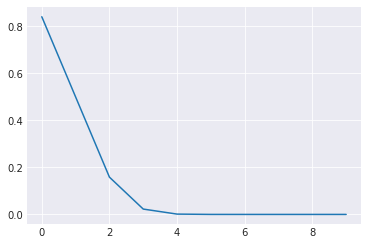

In [212]:
n_array = scipy.stats.norm(loc=numpy.arange(10))
p = n_array.cdf(1)
plt.plot(p)

In [213]:
p = scipy.stats.poisson(numpy.arange(100))

In [220]:
plt.plot(p.sf(numpy.array([5,6])))

ValueError: operands could not be broadcast together with shapes (2,) (100,) 

In [223]:
n = scipy.stats.norm.fit(data)
print(n)

(0.060582852075698704, 0.885156213831585)


In [222]:
n.pdf(0.5)

AttributeError: 'tuple' object has no attribute 'pdf'

## OK, We will have to abandon attempts to subclass scipy.stats.rv_continuous because:
1. Properties set on the `_gen` object are not accessible from the _gen methods, which means we can't store the data histogram.
2. I tried passing the data array around as a shape parameter (this way it would be stored when initialized as a `frozen` instance) but . . . if you pass an array as a shape parameter, it assumes you want an array of distributions. 

## So . . .

For now, we will simply implement a distinct class that does not directly inherit from scipy but provides a similar interface, as we were doing before.

Plan:
    * Initialize using frequencies (as before)
    * use a .fit @static method to generate the necessary parameters from the data
    * keep the .from_data() @class_method and have it call the above
    


In [1]:
DEFAULT

class EmpiricalDistribution():
    def __init__(self, frequencies, support):
        assert support[1] >= support[0]

        self.a, self.b = support
        self.num_bins = len(frequencies)
        self.bin_size = self.support_size / self.num_bins
        self.bin_starts = numpy.linspace(self.support[0], self.support[1] - self.bin_size, num=self.num_bins)
        self.bin_midpoints = self.bin_starts + self.bin_size / 2
        self.bin_ends = numpy.linspace(self.support[0] + self.bin_size, self.support[1], num=self.num_bins)

        self.frequencies = numpy.array(frequencies)
        self.cdf_values = numpy.cumsum(self.frequencies)
        self.sf_values = numpy.cumsum(self.frequencies[::-1])[::-1]  # Double reversal needed to avoid numerical round-off errors close to 1. Maybe we can do all this better natively in logspace?

    @staticmethod
    def fit(data, num_bins=DEFAULT_BINS, pseudocount=DEFAULT_PSEUDOCOUNT, support=None):
        assert len(data) > 0, 'Data must have non-zero length'
        assert sum(numpy.isnan(data)) == 0, 'Data must not contain NaN'
        assert sum(numpy.isinf(data)) == 0, 'Data must not contain inf'
        assert sum(numpy.isneginf(data)) == 0, 'Data must not contain neginf'

        if support is None:
            support = (data.min(), data.max())

        counts, bins = numpy.histogram(data, bins=numpy.linspace(*support, num=num_bins + 1))
        counts += pseudocount
        frequencies = counts / counts.sum()
        return {'support':support, 'frequencies':frequencies}
        
    @classmethod
    def from_data(cls, data, num_bins=DEFAULT_BINS, pseudocount=0, support=None):
        return cls(**cls.fit(data, num_bins=num_bins, pseudocount=pseudocount, support=support))

    @property
    def densities(self):
        return self.frequencies / self.bin_size

    @property
    def support_size(self):
        return self.b - self.a

    def copy(self):
        return type(self)(frequencies=self.densities, support=(self.b, self.a))

    def mean(self):
        """
        Returns the expectation of the random variable described by this distribution
        """
        return numpy.sum(self.frequencies * self.bin_midpoints)

    def std(self):
        """
        Returns the standard deviation of the random variable described by this distribution
        """
        m = self.mean()
        return numpy.sqrt((((self.bin_midpoints - m) ** 2) * self.frequencies).sum())

    def estimate_mean_sample_distro(self, region_size, resample=False):
        """
        From the empirical distribution of a population, return the estimated
        distribution of the mean of a sample of that population of size
        :param:`region_size` over the same support.
        """
        new_frequencies = self.frequencies.copy()
        for i in range(1, region_size):
            new_frequencies = scipy.signal.convolve(new_frequencies, self.frequencies, mode='full', method='direct')
        if resample:
            new_frequencies = resample_array(arr=new_frequencies, new_size=self.num_bins, support=self.support)

        return type(self)(frequencies=new_frequencies, support=self.support)

    def pdf(self, x, smoothing_bandwidth=DEFAULT_PDF_SMOOTHING_BANDWIDTH):
        """
        Returns the PDF evaluated at the points in :param:`x`

        Note: If the data only sparsely populates the frequency histogram
        (because the number of bins is large), then the PDF will be sparse
        as well, which could lead to problems. Use with caution.

        As an experimental workaround, try setting values of :param:`smoothing_bandwidth`
        to a value lower than the number of bins. This will redensify the frequency histogram
        and the corresponding PDF values by smoothing the frequencies with a gaussian
        kernel (equivalent to KDE). Values in the range 5-100 might work well.
        """
        if not smoothing_bandwidth:
            freq_array = self.frequencies
        else:
            freq_array = scipy.convolve(self.frequencies, gaussian_kernel(smoothing_bandwidth), mode='same')

        return freq_array[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)] / self.bin_size

    def cdf(self, x):
        """
        Returns the CDF evaluated at the points in :param:`x`
        """
        return self.cdf_values[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)]

    def sf(self, x):
        return self.sf_values[numpy.maximum(0, numpy.searchsorted(self.bin_starts, x) + BIN_OFFSET)]

    def logsf(self, x):
        # ToDo: Build in standard approximation (should never return 0 p-values)
        return numpy.log(numpy.maximum(self.sf(x), MIN_PVALUE))


    def as_frequency_series(self):
        """
        Return a pandas.Series representing the data frequencies with the left edge of each
        bin as the index.
        """
        return pandas.Series(self.frequencies, index=self.bin_starts)

NameError: name 'DEFAULT_BINS' is not defined